Demonstration of the complex nature of 3 interconnected spiking neurons from [1].

[1] (2017) Rainer Engelken,Fred Wolf "Efficient numerically exact calculation of Lyapunov exponents in spiking neural networks"

In [5]:
using PyPlot

In [2]:
ncalc = 10^7                    # number of spikes in calculation
a = 0 .<[0 0 0; 1 0 1; 0 1 0]   # define adjacency matrix
φ = rand(3)                     # initialize neurons
Φ = Float64[]                   # initialize phase history

0-element Array{Float64,1}

In [87]:
for s = 1:ncalc
    φmax,j = findmax(φ)         # find next spiking neuron j
    dt = pi / 2 - φmax          # calculate next spike time
    φ .+= dt                    # evolve phases till next spike time
    p = a[:, j]                 # postsynaptic neurons
    φ[p] = atan.(tan.(φ[p]).-1) # update postsynaptic neurons with PTC (QIF)
    φ[j] = -π / 2               # reset spiking neuron
    append!(Φ, φ[2:3])         # save neuron 2 & 3 when neuron 1 spikes
end

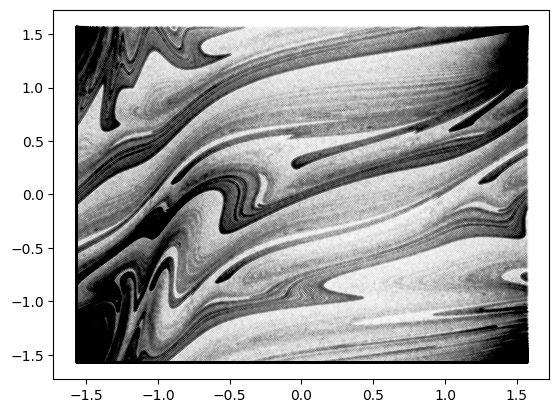

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x199736748>

In [88]:
plot(Φ[1:2:end], Φ[2:2:end], ".k", markersize = .01)#; axis("off")

In [35]:
φ = rand(3)                     # initialize neurons
Φ = Float64[] 
for s = 1:10^7
    φmax,j = findmax(φ)         # find next spiking neuron j
    dt = pi / 2 - φmax          # calculate next spike time
    φ .+= dt                    # evolve phases till next spike time
    p = a[:, j]                 # postsynaptic neurons
    φ[p] = atan.(tan.(φ[p]).-π / 2) # update postsynaptic neurons with PTC (QIF)
    φ[j] = -π / 2               # reset spiking neuron
    append!(Φ, φ[2:3])         # save neuron 2 & 3 when neuron 1 spikes
end

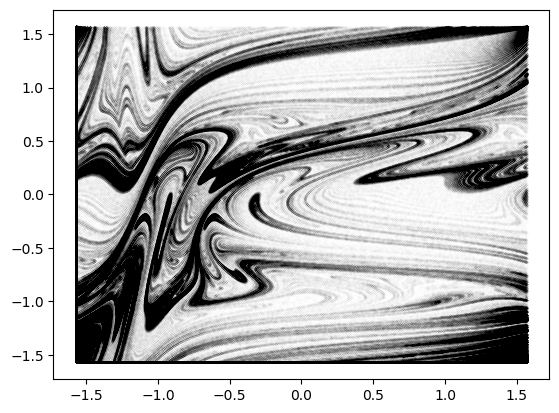

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x187523fd0>

In [36]:
plot(Φ[1:2:end], Φ[2:2:end], ".k", markersize = .01)#; axis("off")